In [68]:
#for mathematical operations import numpy
import numpy as np
#for dataframes import pandas
import pandas as pd
#for data viz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn  as sns
#preprocessing modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder
#model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
# Saving the model
import pickle

## to ignore waarning
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score

In [2]:
#import the data
data = pd.read_csv(r"C:\Users\ERICA COMPUTER HUB\FLIT-Data-Science-Projects-1-15\Basic Fraud Detection with supervised learning\creditcard.csv")

In [3]:
#copy the data
df = data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#checking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

this dataset has no missing values!

In [6]:
#check for the input in our target class
df["Class"].unique()

array([0, 1], dtype=int64)

We have all zeros and ones in our target column class.

In [7]:
#check for imbalanced data
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

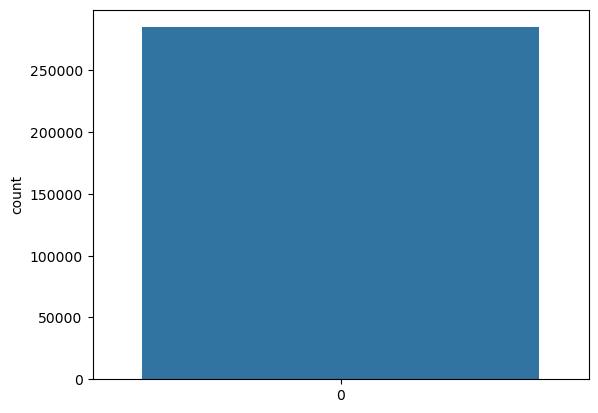

In [8]:
sns.countplot(df["Class"])
plt.show()

In [9]:
#% of the fraudelent against non-fraudulent
#non-fraudulent
print("non-fraudulent:",(284315/284807)*100)

print("fraudulent:",(492/284807)*100)

non-fraudulent: 99.82725143693798
fraudulent: 0.1727485630620034


The data is highly imbalaned with the non-fraudulent having 99% against the fraudulent with less than 1%.For this we willneed to use class weights that will give different weights to the two classes and penalize the misclassification.

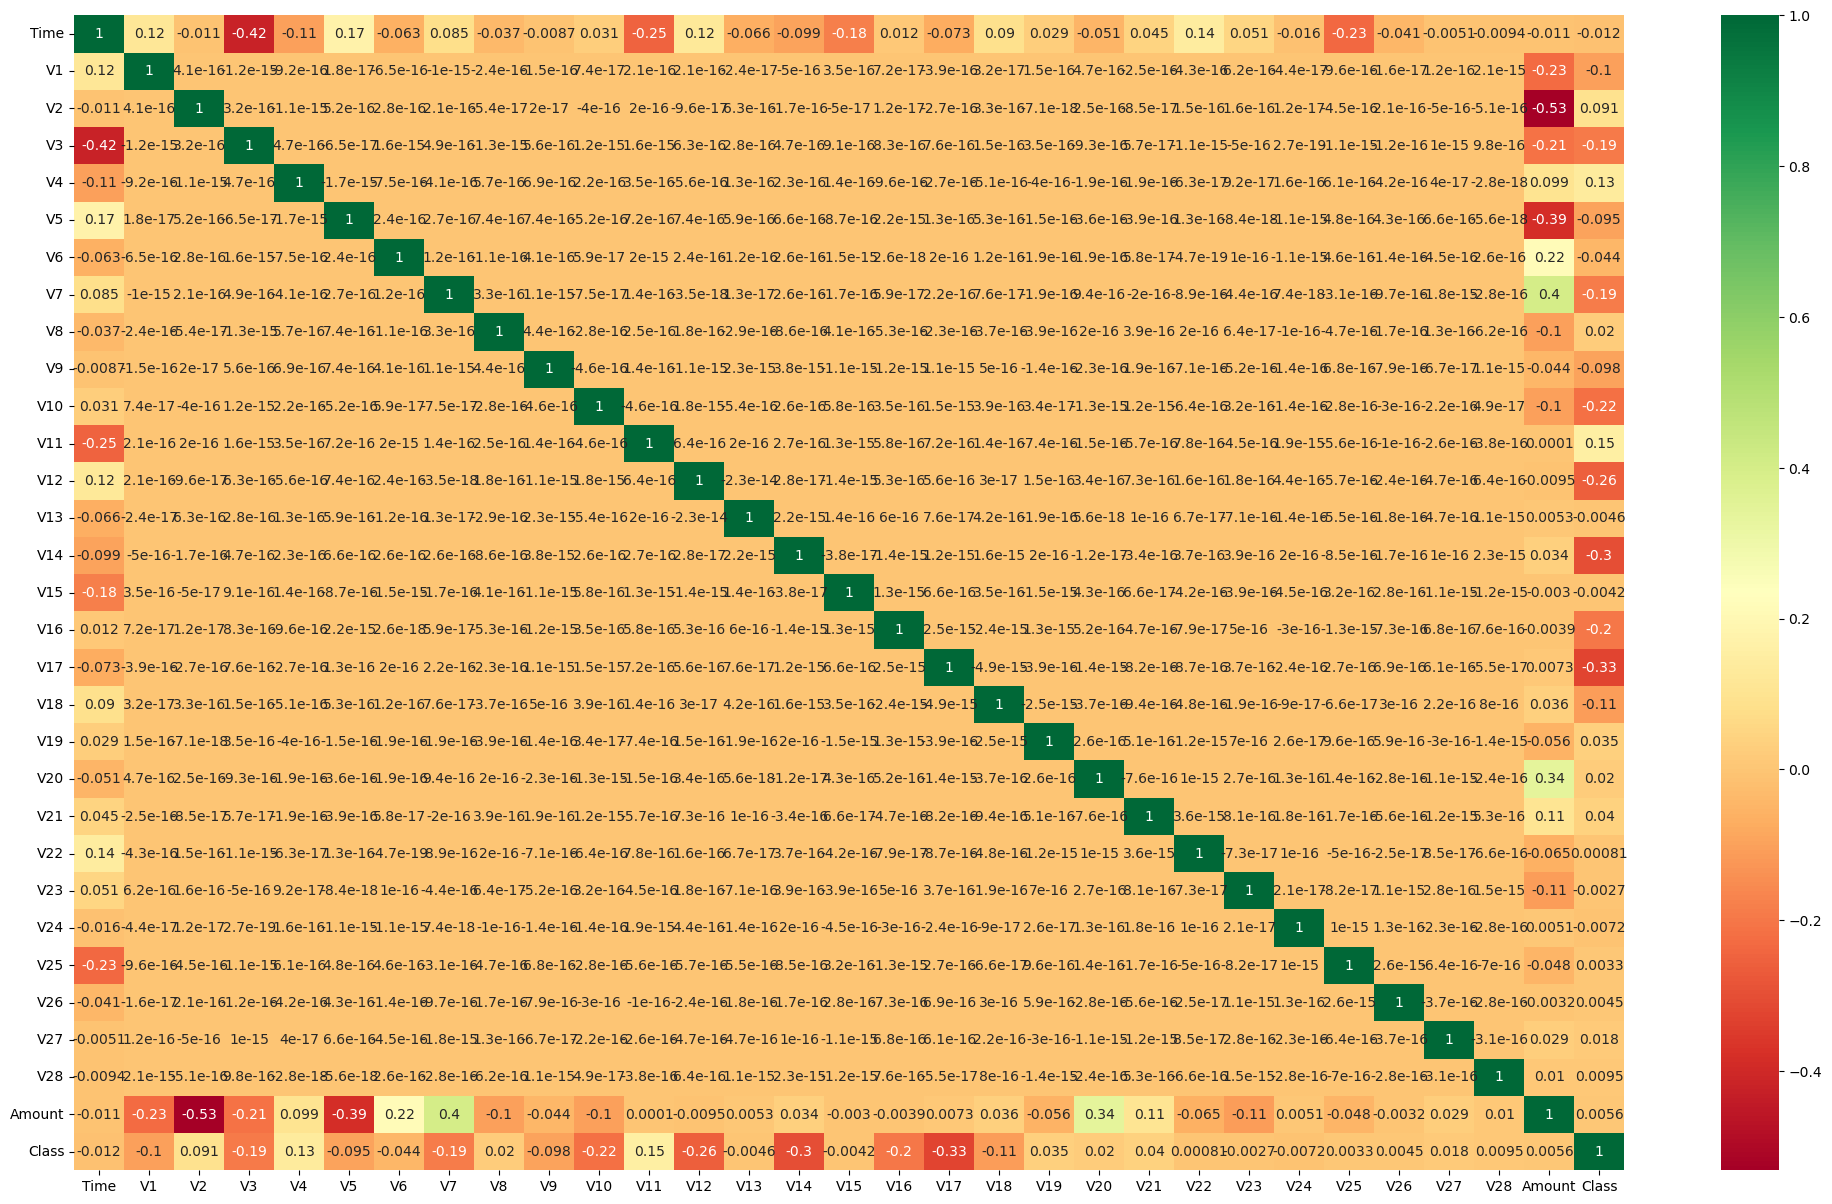

In [10]:
#checking for correlation among the predictors
corr = df.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show() 

This columns df['V8', 'V13', 'V15', 'V20', 'V22', 'V23', 'V25', 'V26'] have the correlation closest to zero and If  was to drop any columns I would start with this but for now I want to see how the model performs with them included,

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Relationship between Time, Amount and Class

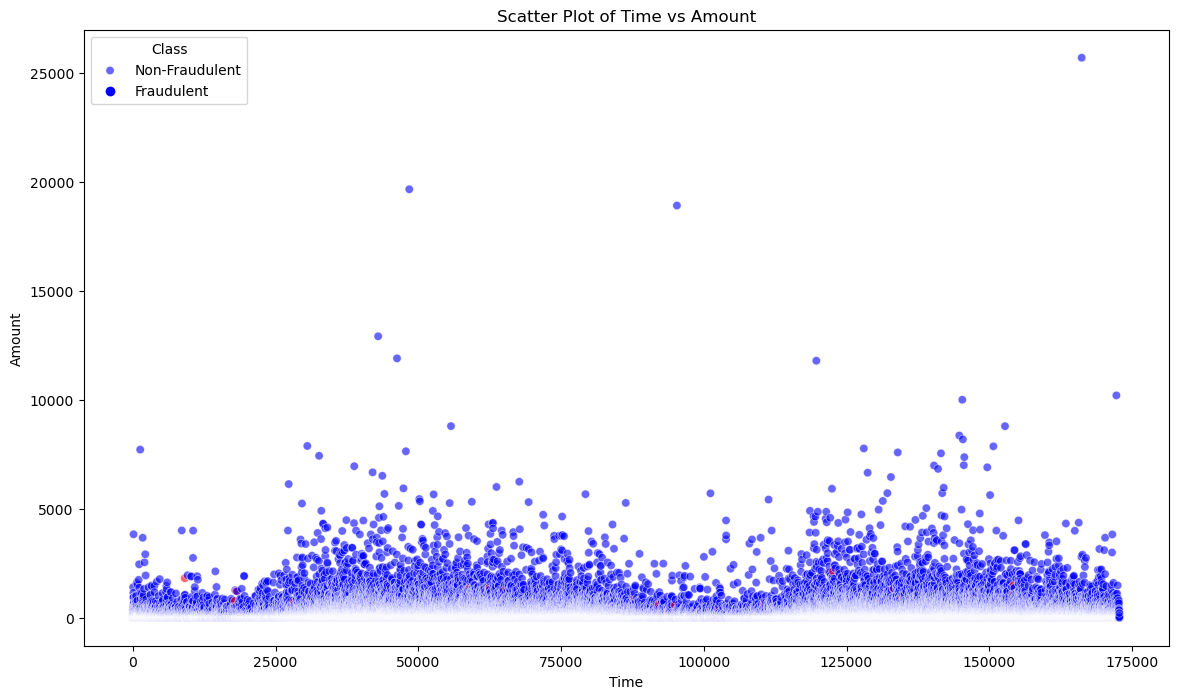

In [12]:

# Scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=data, palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('Scatter Plot of Time vs Amount')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()



From this graph we can see the fraudulent amount is less than 2500, but lets see if it is true.

In [13]:
amount_more = 0
amount_less = 0
for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"] < 2500):
        amount_less += 1
    else:
        amount_more += 1
print("amount more than 2500:",amount_more)
print("amount less than 2500:",amount_less)
    

amount more than 2500: 449
amount less than 2500: 284358


In [14]:
#what % of the transactions are less than 2500
percentage_less = (amount_less/df.shape[0])*100
percentage_less

99.84234938045763

So 99.84% of our total transactions are less than 2500

In [15]:
#how many of this transactions less than 2500 are fraudulent
fraud = 0
legitimate = 1
for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"]<2500):
        if(df.iloc[i]["Class"] == 0):
            legitimate += 1
        else:
            fraud+=1
print(fraud)
print(legitimate)

492
283867


Fraudulent transactions in the whole data were 492 and even in  transactions under 2500 they are still 492.So we have proved that all the fraudulent transactions were less than 2500.

# Relationship between time and transaction

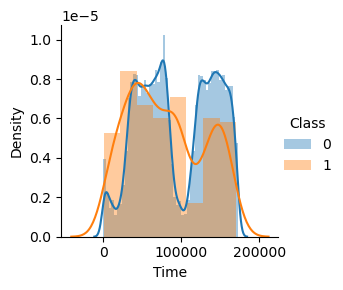

In [16]:
sns.FacetGrid(df, hue="Class").map(sns.distplot,"Time").add_legend()
plt.show()

fraudulent transactions were spread out over time.

# Handling imbalanced dataset

In [30]:
from sklearn.preprocessing import StandardScaler
# Normalize/Standardize numerical features
scaler = StandardScaler()
features = df.columns.difference(['Class'])
df[features] = scaler.fit_transform(df[features])



In [48]:
y = df["Class"]
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [46]:
#split data into target and features
X = df.drop(columns="Class")
print(X.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [49]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:

#Handle imbalanced data with Smote
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [57]:
# Assuming X_res and y_res are your resampled features and target after SMOTE
print("X_res shape:", X_res.shape)
print("y_res shape:", y_res.shape)



X_res shape: (398040, 30)
y_res shape: (398040,)


In [54]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_res, y_res, discrete_features=False, random_state=1), index=X_train.columns)
mutual_infos.sort_values(ascending=False)

V14       0.483710
V17       0.441455
V10       0.420362
V12       0.409942
V4        0.395269
Amount    0.393026
V11       0.378190
V3        0.341705
V16       0.334529
V7        0.286969
V2        0.275857
V9        0.235771
V21       0.229200
V27       0.215199
V18       0.199677
V1        0.188972
V6        0.175737
V28       0.164142
V5        0.159640
V8        0.154834
V19       0.123614
Time      0.122984
V20       0.106297
V24       0.070011
V23       0.061804
V26       0.048344
V25       0.033777
V22       0.030369
V13       0.025865
V15       0.023933
dtype: float64

<Axes: xlabel='Class', ylabel='count'>

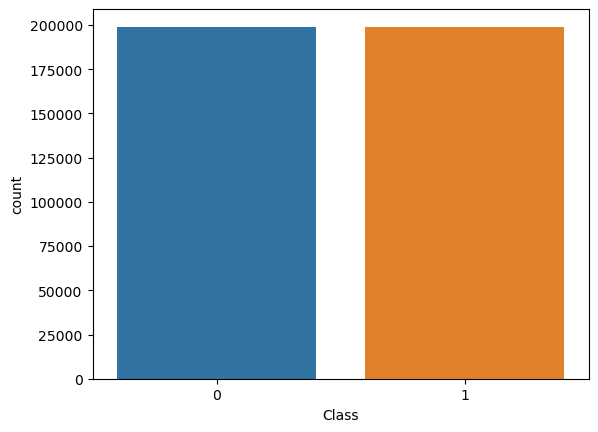

In [58]:
sns.countplot(x=y_res)

the data has been balanced and ready for model training

In [ ]:
#import matplotlib.pyplot as plt
# Plot distribution after SMOTE (minority class)
#plt.hist(X_res, bins='auto', label=f"SMOTE ({X})")

# Model training

## Baseline model

In [60]:
from sklearn.metrics import mean_absolute_error
y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean P2 Reading:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: 0.0
Baseline MAE: 0.0


In [63]:
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True)
}

In [64]:
# Training and evaluation loop
results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

In [71]:
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]  # For ROC AUC score
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    results.loc[clf_name] = [accuracy, precision, recall, f1, roc_auc]

# Display results
print("Results:")
print(results)

Results:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.999333   0.902655  0.689189  0.781609  0.978057
Random Forest        0.999614   0.932331  0.837838  0.882562  0.954828
Gradient Boosting    0.998432   0.684211  0.175676  0.279570  0.290545
SVM                  0.999462   0.939655  0.736486  0.825758  0.930343


Random Forest has the recall, F1 score and second highest precision and accuracy making it the best model.

In [81]:
best_model = results.loc[results['F1 Score'].idxmax()]
print("Best Model based on F1 Score:")
print(best_model)

Best Model based on F1 Score:
Accuracy     0.999614
Precision    0.932331
Recall       0.837838
F1 Score     0.882562
ROC AUC      0.954828
Name: Random Forest, dtype: float64


In [82]:
# Identify the best model based on F1 Score
best_model_name = results['F1 Score'].idxmax()
print(f"The best model is: {best_model_name}")


The best model is: Random Forest


In [83]:
best_model = classifiers[best_model_name]

In [86]:
# Retrain the best model on the full dataset
best_model.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

In [87]:
# Save the model to a file
import joblib
joblib.dump(best_model, 'best_fraud_detection_model.pkl')
print(f"The {best_model_name} model has been retrained on the balanced full dataset and saved.")

The Random Forest model has been retrained on the balanced full dataset and saved.
